### 색상의 개념

1. RGB  
    빨강(Red), 녹색(Green), 파랑(Blue) 3원색을 0-255 범위 내에서 조절하여 색을 표현  
    - 흰색(0, 0, 0) ~ 검은색(255, 255, 255) 
  
2. HSL  
    색조(Hue), 채도(Saturation), 밝기(Lightness)로 색 표현  
    - 색조(Hue) : 0 ~ 360도로 값 표현 / 빨간색(0), 노란색(60), 초록색(120), 파란색(240) 등  
    - 채도(Saturation) : 0 ~ 100%일 경우 진함의 정도 / 0%(무채색), 100%(아주진한색상)  
    - 밝기(Lightness) : 0 ~ 100%일 경우 밝음의 정도 / 0%(완전한 검은색), 100%(완전한 흰색)  
     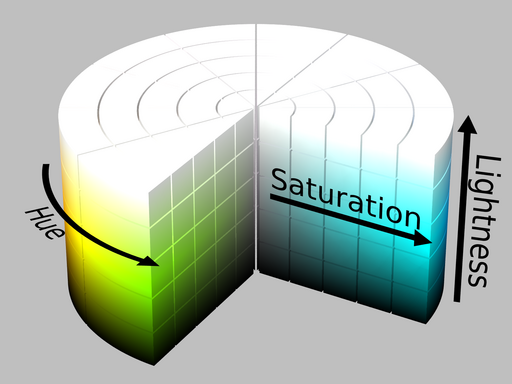  
       
3. HSV  
    색조(Hue), 채도(Saturation), 명도(Value)로 색 표현  
    - 색조, 채도는 HSL과 같음  
    - 명도(Value) : 0 ~ 100%일 경우 / 0%(검은색), 100%(색상전체밝기)  
    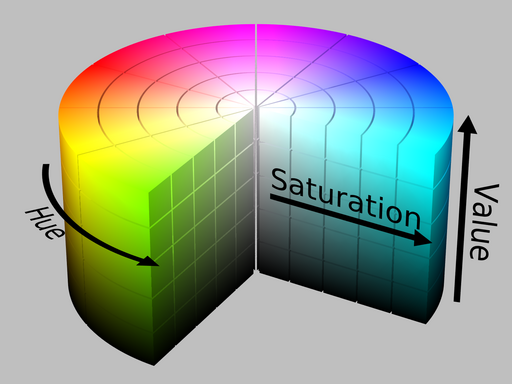

### 특정 색 검출

1. 이미지 비트 연산  
   - 이미지의 채널마다 픽셀을 비교하며 판단하는 함수 
      
   - cv2.bitwise_and(src1, src2, mask=src_m)  
   - cv2.bitwise_or(src1, src2, mask=src_m)  
   - cv2.bitwise_xor(src1, src2, mask=src_m)  
     
   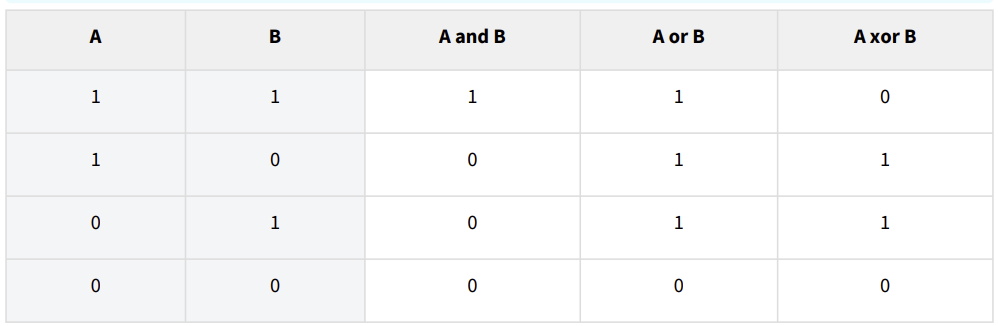  
   (1 : 참, 0 : 거짓)

In [1]:
import cv2

# 두개의 이미지를 읽어오기
img1 = cv2.imread('./img_data/ractangle.png')
img2 = cv2.imread('./img_data/circle.png')

# 이미지 사이즈가 다를 경우 같은 사이즈로 맞춰야함
src1 = cv2.resize(img1,(500,500))
src2 = cv2.resize(img2,(500,500))

# 이미지 비트 연산 부분
bitwiseand = cv2.bitwise_and(src1,src2)
bitwiseor = cv2.bitwise_or(src1,src2)
bitwisexor = cv2.bitwise_xor(src1,src2)

# 이미지 출력
cv2.imshow('bitwise_and', bitwiseand)
cv2.imshow('bitwise_or', bitwiseor)
cv2.imshow('bitwise_xor', bitwisexor)

cv2.waitKey()
cv2.destroyAllWindows()


>결과  
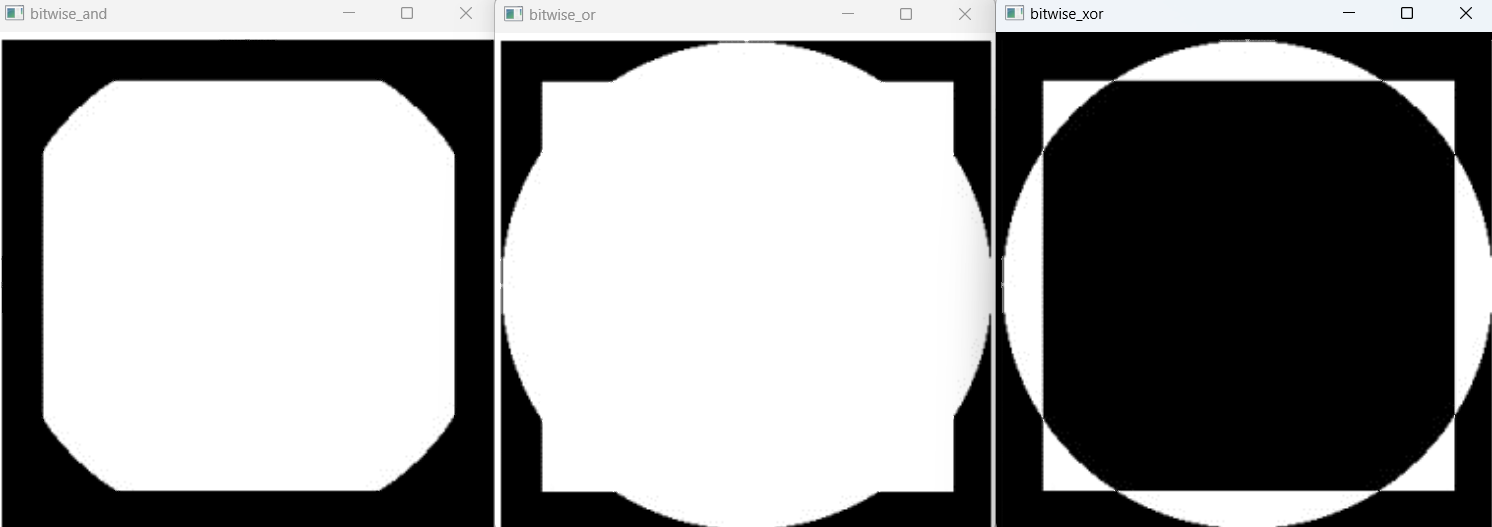

2. inRange 함수를 이용한 색 검출  
cv2.inRange(src, lowerb, upperb, dst=None) → dst  
    - src: 입력 영상  
    - lowerb: 하한 값 행렬 또는 스칼라  
    - upperb: 상한 값 행렬 또는 스칼라  
    - dst: 입력 영상과 같은 크기의 마스크 영상   


In [2]:
import sys
import numpy as np
import cv2

src = cv2.imread('./img_data/candy.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()
    
# hsv로 이미지 변환    
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# 원본이미지와 hsv이미지에 각각 초록색 범위를 inRange함수 적용
dst1 = cv2.inRange(src, (0,128,0), (100,255,100))
dst2 = cv2.inRange(src_hsv, (50,150,0), (80,255,255))

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

>결과  
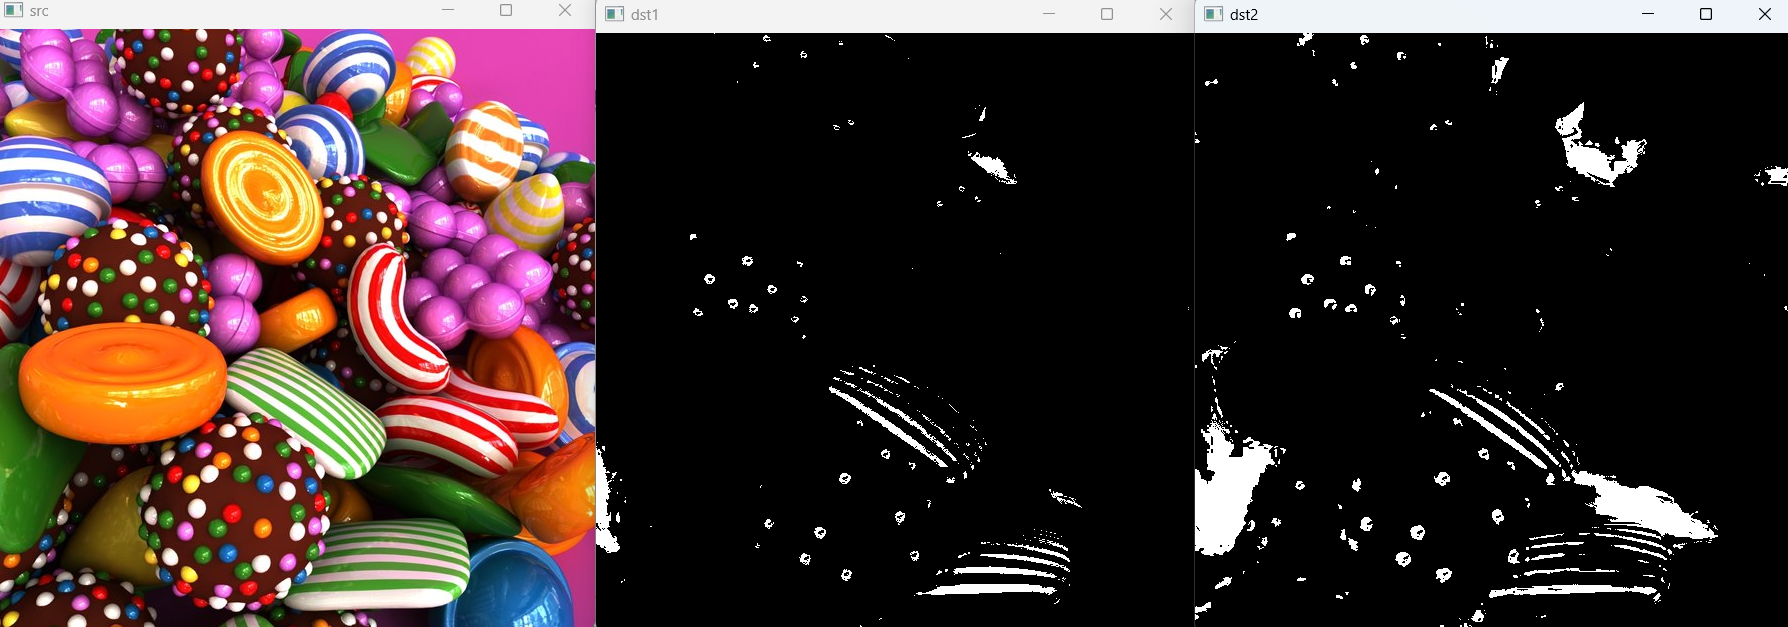

3. 영상에서 색 검출  

In [3]:
import cv2
import numpy as np

## 저장된 동영상 사용
fpath = './avi_data/cat.mp4'
video = cv2.VideoCapture(fpath)
## 노트북 내장 카메라 사용
# video = cv2.VideoCapture(0)
## 외장 카메라 사용
# video = cv2.VideoCature(1)

# 추출 여부 플래그
do_composit = False

while True:
    ret, frame = video.read()

    if not ret:
        break
    
    # 추출 모드라면
    if do_composit:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        lower_red = np.array([170, 50, 50]) # 지정할 빨간색 범위
        upper_red = np.array([180, 255, 255])

        mask_B = cv2.inRange(hsv, lower_red, upper_red) # 빨간색만 검출
        res = cv2.bitwise_and(frame, frame, mask=mask_B)

        cv2.imshow('frame', res)
    
    # 추출 모드가 아니라면
    else:
        cv2.imshow('frame', frame)

    key = cv2.waitKey(30)
    if key == ord(' '): # Space 누르면 원본 모드 <--> 검출 모드
        do_composit = not do_composit
    elif key == 27:
        break
video.release()
cv2.destroyAllWindows()

>결과  
<video controls src="avi_data/color_detected_1.mp4" title="Title"></video>

2. 인식한 영역의 좌표 출력  

In [ ]:
import cv2
import numpy as np

# 저장된 동영상 사용
fpath = './avi_data/cat.mp4'
video = cv2.VideoCapture(fpath)
## 내부 카메라 사용
# video = cv2.VideoCapture(0)
## 외부 카메라 사용
# video = cv2.VideoCapture(1)

# 추출 여부 플래그
# 실시간으로 카메라를 읽어와 색상추출 여부 확인
do_composit = False

while True:
    ret, frame = video.read()

    if not ret:
        break

    # 추출모드인 경우   
    if do_composit:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        
        # 지정할 빨간색 범위를 검출
        lower_red = np.array([170, 50, 50]) 
        upper_red = np.array([180, 255, 255])
        
        # 마스크를 생성하여 마스크와 비트연산을 하여 특정색만 추출한 프레임을 창에 띄움
        mask_B = cv2.inRange(hsv, lower_red, upper_red) # 지정한 색만 검출
        res = cv2.bitwise_and(frame, frame, mask=mask_B)
        
        # 윤곽을 찾음
        contours, _ = cv2.findContours(mask_B, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        # 윤곽을 그리고 경계 사각형의 좌표를 출력
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            print("Detected red area at (x={}, y={}), width={}, height={}".format(x, y, w, h))
            cv2.rectangle(res, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        cv2.imshow('frame', res)
    
    # 추출모드가 아닌 경우
    else:
        cv2.imshow('frame', frame)

    key = cv2.waitKey(30)       # 30 : 다음 프레임을 읽기까지의 지연 시간
    
    # Space 누르면 원본 모드 <--> 검출 모드
    if key == ord(' '): 
        do_composit = not do_composit
    # Esc 누르면 종료
    elif key == 27:
        break
    
video.release()
cv2.destroyAllWindows()


>결과  
<video controls src="avi_data/color_detected_1.mp4" title="Title"></video>     
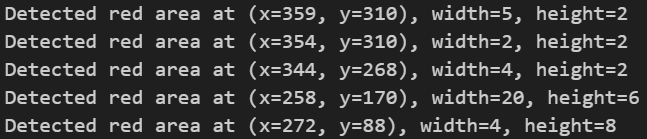